In [ ]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, preprocessing
import numpy.polynomial.polynomial as poly
%matplotlib inline

# Importing Data 
Import data from `poly_regression.csv`. Please put `poly_regression.csv` file under the **_SAME DIRECTORY_** of your `HW3_prog_<netid>.ipynb` file.

In [ ]:
#for my gdrive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the poly_regression.csv into df(<pd.Dataframe>)
# then convert df to data(<np.ndarray>)
# and import the first column in X(<np.ndarray>) and the second column in Y(<np.ndarray>)

#I am using Google Collab to complete this assignment, therefore I am just going to access the csv through github. 
df = pd.read_csv('https://raw.githubusercontent.com/KHVIII/Machine_Learning_Learning/main/poly_regression.csv')
#df = pd.read_csv('poly_regression.csv')

data = df.to_numpy()
X = (data[:,0])
y = (data[:,1])


In [ ]:

# Reshape X and Y to be rank 2 matrices X_2d(<np.ndarray>) and y_2d(<np.ndarray>)
X_2d = X.reshape(X.shape[0],1)
y_2d = y.reshape(y.shape[0],1)



# Training and Validation Set
Divide the dataset approximately into 2 equal parts : training set and validation set. 

In [ ]:

# Save the first 100 rows in X_tr(<np.ndarray>), y_tr(<np.ndarray>) as 1D arrays
# and the next 100 in X_val(<np.ndarray>) and y_val(<np.ndarray>) as 1D arrays
X_tr = X_2d[:100,0]
y_tr = y_2d[:100,0]
X_val = X_2d[100:200,0]
y_val = y_2d[100:200,0]

# Plotting Dataset

Plot `X_tr` versus `y_tr` as a scatter plot. Make sure your plot has **grid lines**, a **_title_** and **_labels_** on axes. 

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Q04
manual: true
points: 3
-->

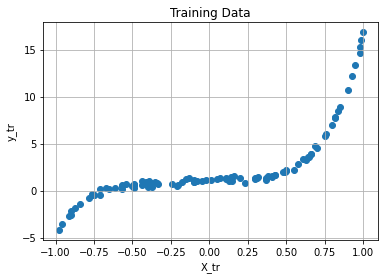

In [ ]:

plt.scatter(X_tr,y_tr)
plt.grid()
plt.title("Training Data")
plt.xlabel("X_tr")
plt.ylabel("y_tr")
plt.show(block=False)

<!-- END QUESTION -->



Plot `X_val` versus `y_val` as a scatter plot. Make sure your plot has **grid lines**, a **_title_** and **_labels_** on axes. **_DO NOT MODIFY_** 

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Q05
manual: true
points: 3
-->

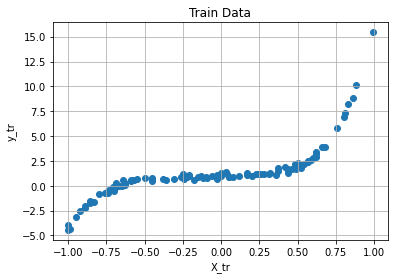

In [ ]:

plt.scatter(X_val,y_val)
plt.grid()
plt.title("Train Data")
plt.xlabel("X_tr")
plt.ylabel("y_tr")
plt.show(block=False)

<!-- END QUESTION -->



# Model Selection.
Write code to obtain polynomial regression models of different orders starting from linear regression i.e. `degree = 1` to higher degree models like `degree = 2 to 10`. Find training and validation error for every order and plot these errors v/s degree. Select the order that fits the data best based on validation error. You can use `poly.polyval` method from numpy to find coefficients of the different models.

In [ ]:

# Record the training error, validation error and theta in train_costs(<list>), validation_costs(<list>) and theta_dict(<dict>) for degrees = 1, 2, 3,..., 10 
# Create degrees using range object and assign to model_degree(<range>)
# Use poly.polyfit to find the theta values and poly.polyval to find the yhat values

validation_costs = []
train_costs = []
theta_dict = {}
model_degree = [1,2,3,4,5,6,7,8,9,10]

for d in model_degree:
    print('Order: ', d)
    theta = np.polynomial.polynomial.polyfit(X_tr,y_tr,d) #
    yhat = np.polynomial.polynomial.polyval(X_val,theta) #
    validation_cost = ((yhat-y_val)**2).sum() #
    theta_dict[d] = theta
    validation_costs.append(validation_cost)
    print('Theta: ', theta)
    yhat_train = np.polynomial.polynomial.polyval(X_tr,theta) #
    train_cost = ((yhat_train-y_tr)**2).sum() #
    train_costs.append(train_cost)
    print('Train cost: ', train_cost)
    print('-------------------------')

Order:  1
Theta:  [2.16579369 5.43898469]
Train cost:  592.9441967807538
-------------------------
Order:  2
Theta:  [0.44618458 5.09033863 5.2804055 ]
Train cost:  355.8146443537794
-------------------------
Order:  3
Theta:  [ 0.55893574 -1.59120711  4.41133827 11.4152637 ]
Train cost:  35.707177916038596
-------------------------
Order:  4
Theta:  [ 1.11567721 -1.42081481 -0.76247405 10.96628796  5.91842245]
Train cost:  14.670147224509822
-------------------------
Order:  5
Theta:  [ 1.0610661   0.63386696 -0.03763316  1.25344472  4.90089066  8.70669821]
Train cost:  3.6480169805246643
-------------------------
Order:  6
Theta:  [ 1.10024436  0.6471299  -0.80610583  1.12405162  7.22629427  8.86675156
 -1.70938989]
Train cost:  3.5365354870644543
-------------------------
Order:  7
Theta:  [ 1.10059775  0.62659101 -0.81238938  1.30376005  7.24936749  8.47401471
 -1.73008737  0.24190378]
Train cost:  3.536033521447037
-------------------------
Order:  8
Theta:  [  1.16097512   0.6840

Plot training dataset and the hypothesis function for each degree. Use `plt.xlim(-1.5,1.5)`,`plt.ylim(-7,7)` for the range of the plot. Make sure your plot has **grid lines**, a **_title_** and **_labels_** on axes. 

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Q07
manual: true
points: 10
-->

Degree:  1


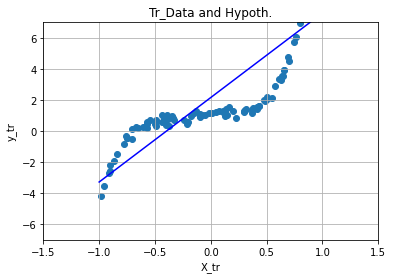

Degree:  2


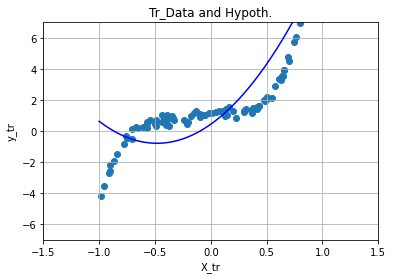

Degree:  3


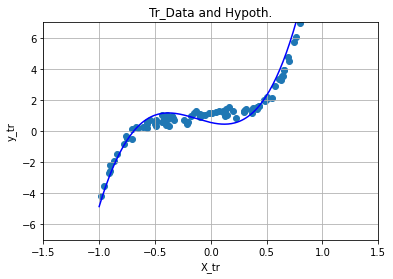

Degree:  4


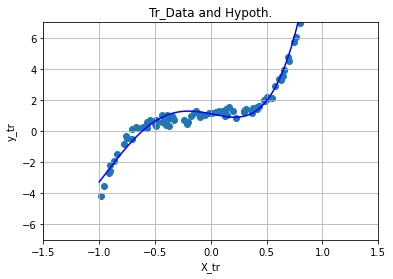

Degree:  5


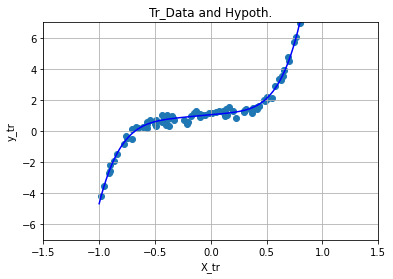

Degree:  6


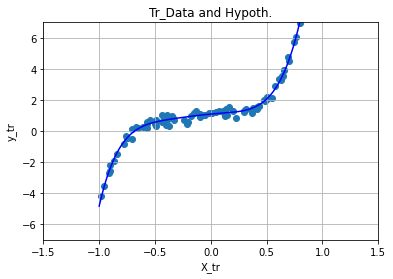

Degree:  7


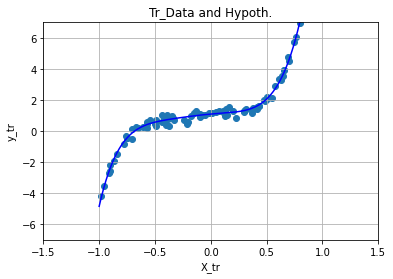

Degree:  8


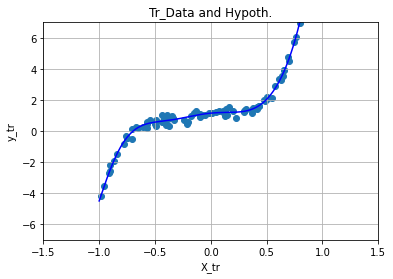

Degree:  9


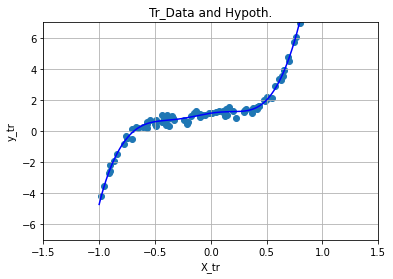

Degree:  10


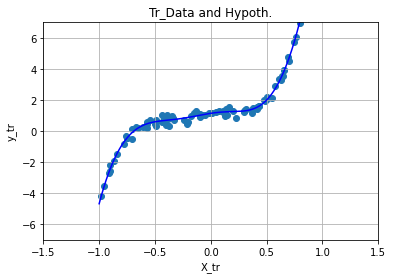

In [ ]:

for d in model_degree:
    print('Degree: ', d)
    # Plot data
    plt.scatter(X_tr,y_tr)
    plt.title("Tr_Data and Hypoth.")
    plt.xlabel("X_tr")
    plt.ylabel("y_tr")

    xp = np.linspace(-1,1,200)
    yp_hat = np.polynomial.polynomial.polyval(xp,theta_dict[d])
    # Plot hypothesis
    plt.plot(xp,yp_hat,c='blue')

    plt.grid()
    plt.xlim(-1.5,1.5)
    plt.ylim(-7,7)

    plt.show(block=False)
    

<!-- END QUESTION -->



Plot `train_cost` versus `Model order` as line plot with style of `'.-'`. Make sure your plot has **grid lines**, a **_title_** and **_labels_** on axes. 

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Q08
manual: true
points: 4
-->

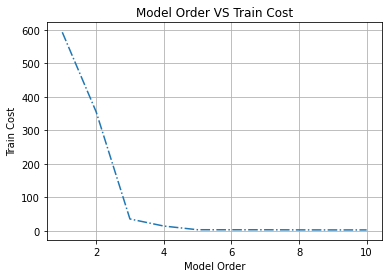

In [ ]:

plt.plot(model_degree,train_costs,linestyle='-.')
plt.title("Model Order VS Train Cost")
plt.xlabel("Model Order")
plt.ylabel("Train Cost")
plt.grid()
plt.show(block=False)

<!-- END QUESTION -->



Plot `validation_cost` versus `model_degree` as line plot with style of `'.-'`. Make sure your plot has **grid lines**, a **_title_** and **_labels_** on axes. 

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Q09
manual: true
points: 4
-->

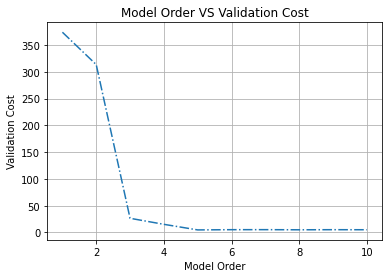

In [ ]:

plt.plot(model_degree,validation_costs,linestyle='-.')
plt.title("Model Order VS Validation Cost")
plt.xlabel("Model Order")
plt.ylabel("Validation Cost")
plt.grid()
plt.show(block=False)
plt.show(block=False)